## Learn Scikit-Learn

### overview
* Built on NumPy, SciPy, and matplotlib
* 中文文档 http://sklearn.apachecn.org/cn/0.19.0/
* 英文文档 http://scikit-learn.org/stable/index.html

### features
* supervised learning监督学习（train数据包含结果值）
    * Classification 分类
        * Identifying to which category an object belongs to.
        * Applications: Spam detection, Image recognition.
    * Regression 回归
        * Predicting a continuous-valued attribute associated with an object.
        * Applications: Drug response, Stock prices
* unsupervised learning无监督学习
    * Clustering 聚类
        * Automatic grouping of similar objects into sets.
        * Applications: Customer segmentation, Grouping experiment outcomes
* Dimensionality reduction 数据降维
* Model selection 模型选择
* Preprocessing 数据预处理

### dataset
* training set
* testing set

### Misc
另一方面，Scikit-learn也有缺点。例如它不支持深度学习和强化学习，这在今天已经是应用非常广泛的技术，例如准确的图像分类和可靠的实时语音识别和语义理解等。此外，它也不支持图模型和序列预测，不支持Python之外的语言，不支持PyPy，也不支持GPU加速。

### supervised learning
* Collect Training Data -> Train Classifier -> Make Predictions

* many kinds of classifiers
    * Artificial neural network
    * Support Vector Machine
    * etc

### Training Data

| Weight | Texture | Label |
| --- | --- | --- |
| 150g | Bumpy | Orage |
| 170g | Bumpy | Orage |
| 140g | Smooth | Apple |
| 130g | Smooth | Apple |

* the whole table is our training data
* **features**: Weight, Texture
* **examples**: each row of the table

![machine learning map](ml_map.png)

In [8]:
from sklearn import tree

# collect training data
textureNames = {0: 'Bumpy', 1:'Smooth'}
labelNames = {0: 'Apple', 1: 'Orange'}
features = [[150, 0], [170, 0], [140, 1], [130, 1]]
lables = [1,1,0,0]

# training classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, lables)

# make predictions
print(clf.predict([[150,0]]))

[1]


## have a try with Iris data
Iris has 150 samples, 4 features
* 4 features
    * sepal length 花萼长度
    * sepal width  花萼宽度
    * petal length 花瓣长度
    * petal width  花瓣宽度
* 3 targets
    * setosa 山鸢尾花       0
    * versicolor 变色鸢尾花   1
    * virginica 维吉尼亚鸢尾花 2

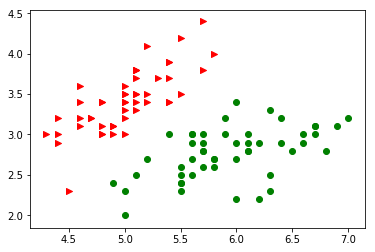

In [23]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

features = iris.data
target = iris.target
# print(features)
# note below 3 plts will be combined into one chart
for t,marker,c in zip(range(3), '>ox', 'rgb'):
    plt.scatter(features[target == t, 0],
               features[target == t, 1],
               marker = marker,
               c = c)

In [20]:
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
test_idx = [0, 50, 100] #select 3 samples as test data

# training data
train_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

# testing data
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

# training classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_target)

# make predictions
print(test_target)
print(clf.predict(test_data))

[0 1 2]
[0 1 2]


### what makes a good feature?

[30.00821269 25.0298606  30.5702317  28.60814055]
[24.  21.6 34.7 33.4]


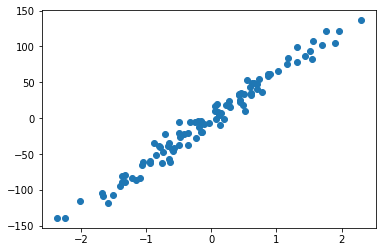

In [2]:
%matplotlib inline

from __future__ import print_function
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

loaded_data = datasets.load_boston() #波士顿房价
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

print(model.predict(data_X[:4, :]))
print(data_y[:4])

X, y = datasets.make_regression(n_samples=100, n_features=1, n_targets=1, noise=10)
plt.scatter(X, y)
plt.show()

## models

In [6]:
%matplotlib inline

from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

loaded_data = datasets.load_boston() #波士顿房价
data_X = loaded_data.data
data_y = loaded_data.target

model = LinearRegression()
model.fit(data_X, data_y)

# y = 0.1x + 0.3
print(model.coef_) # 0.1
print(model.intercept_) #0.3

[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
36.49110328036104


## normalization 标准化数据, also called feature scaling
通常会在train之前对数据进行提炼，很多时候一个简单算法在提炼过的数据上的表现，会比一个非常复杂的算法在原始数据上的表现会更好。

有人也叫这部分工作为feature engineering

In [5]:
from sklearn import preprocessing
import numpy as np

a = np.array([[10,2.7,3.6],
             [-100,5,-1],
             [120,20,40]], dtype=np.float64)

print(a)
print(preprocessing.scale(a))

[[  10.     2.7    3.6]
 [-100.     5.    -1. ]
 [ 120.    20.    40. ]]
[[ 0.         -0.85170713 -0.57797932]
 [-1.22474487 -0.55187146 -0.82880054]
 [ 1.22474487  1.40357859  1.40677986]]


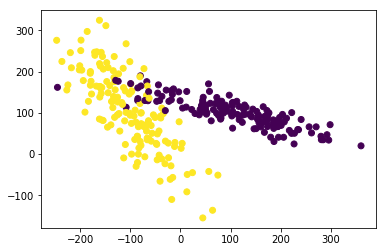

accuracy without normalization:  0.5333333333333333
accuracy with normalization:  0.9222222222222223


In [13]:
%matplotlib inline

from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# generate sample data
X, y = make_classification(n_samples=300, n_features=2 , n_redundant=0, n_informative=2,
                           random_state=22, n_clusters_per_class=1, scale=100)
plt.scatter(X[:, 0], X[:, 1], c=y) #X[:, 0] feature 1, X[:, 1] feature 2
plt.show()

# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) 
# our model
clf = SVC()
# train our model, let our model learn
clf.fit(X_train, y_train)
# use test data to predict, score is to determin how accurate our prediction is
print("accuracy without normalization: ", clf.score(X_test, y_test)) 

# normalization step
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) 
clf2 = SVC()
clf2.fit(X_train, y_train)
print("accuracy with normalization: ", clf2.score(X_test, y_test)) 

## cross validation 交叉验证: train_test分成好多组

## nice web sites to learn ML
* https://morvanzhou.github.io/

## Reinforcement Learning 强化学习
* 监督学习是已经有了数据+标签(target, 答案), 强化学习是计算机开始是什么都不懂的，要计算机自己去学
* 可以用来自动下棋，玩游戏，etc

## Reinforcement Learning Algrithms
* Model-Free RL (不理解环境)
* Model-Based RL (理解环境)
* 通过价值选行为
    * Q learning
    * Sarsa
    * Deep Q Network
*  直接选行为
    * Policy Gradients